In [ ]:
# STEP 1: Environment setup

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.19.0


In [ ]:
# STEP 2: Install kagglehub

!pip install -q kagglehub


In [ ]:
# STEP 3: Download Chest X-Ray Balanced dataset using kagglehub

import kagglehub

dataset_path = kagglehub.dataset_download("umitka/chest-x-ray-balanced")

print("Dataset downloaded to:", dataset_path)


100%|██████████| 6.90G/6.90G [05:22<00:00, 23.0MB/s]

Extracting files...


Dataset downloaded to: /root/.cache/kagglehub/datasets/umitka/chest-x-ray-balanced/versions/1


In [ ]:
# STEP 4: Dataset paths (correct for kagglehub)

train_dir = dataset_path + "/train"
val_dir   = dataset_path + "/val"
test_dir  = dataset_path + "/test"

# Verify paths
print("Train dir:", train_dir)
print("Val dir:", val_dir)
print("Test dir:", test_dir)


Train dir: /root/.cache/kagglehub/datasets/umitka/chest-x-ray-balanced/versions/1/train
Val dir: /root/.cache/kagglehub/datasets/umitka/chest-x-ray-balanced/versions/1/val
Test dir: /root/.cache/kagglehub/datasets/umitka/chest-x-ray-balanced/versions/1/test


In [ ]:
# CHECK CELL: Verify dataset folders really exist

import os

print("Does train_dir exist?", os.path.exists(train_dir))
print("Does val_dir exist?", os.path.exists(val_dir))
print("Does test_dir exist?", os.path.exists(test_dir))

print("\nContents of dataset_path:")
print(os.listdir(dataset_path))


Does train_dir exist? False
Does val_dir exist? False
Does test_dir exist? False

Contents of dataset_path:
['chest_xray_balanced']


In [ ]:
# FIXED STEP 4: Correct dataset paths (one level deeper)

base_dir = dataset_path + "/chest_xray_balanced"

train_dir = base_dir + "/train"
val_dir   = base_dir + "/val"
test_dir  = base_dir + "/test"

# Verify again
import os
print("Train exists:", os.path.exists(train_dir))
print("Val exists:", os.path.exists(val_dir))
print("Test exists:", os.path.exists(test_dir))

print("\nTrain folder contents:")
print(os.listdir(train_dir))


Train exists: True
Val exists: True
Test exists: True

Train folder contents:
['NORMAL', 'PNEUMONIA']


In [ ]:
# STEP 5: Data augmentation and image generators

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Training data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

# Validation & test data (no augmentation)
val_test_datagen = ImageDataGenerator(
    rescale=1.0 / 255
)

# Load training images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary"
)

# Load validation images
val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary"
)

# Load test images
test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    shuffle=False
)


Found 8000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [ ]:
# STEP 6: Build a custom CNN model from scratch

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# Convolution Block 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))

# Convolution Block 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

# Convolution Block 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

# Fully connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer (binary classification)
model.add(Dense(1, activation='sigmoid'))

# Model summary
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# STEP 7: Compile the model

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("Model compiled successfully")


Model compiled successfully


In [ ]:
# STEP 8: Train the model

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 282s 1s/step - accuracy: 0.7770 - loss: 0.5195 - val_accuracy: 0.7725 - val_loss: 0.4379
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 265s 1s/step - accuracy: 0.9103 - loss: 0.2203 - val_accuracy: 0.8500 - val_loss: 0.4057
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 253s 1s/step - accuracy: 0.9157 - loss: 0.2032 - val_accuracy: 0.9175 - val_loss: 0.2316
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 252s 1s/step - accuracy: 0.9267 - loss: 0.1830 - val_accuracy: 0.8712 - val_loss: 0.3770
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 254s 1s/step - accuracy: 0.9331 - loss: 0.1694 - val_accuracy: 0.9200 - val_loss: 0.2118
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 249s 997ms/step - accuracy: 0.9280 - loss: 0.1785 - val_accuracy: 0.9150 - val_loss: 0.2824
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 231s 925ms/step - accuracy: 0.9407 - loss: 0.1433 - val_accuracy: 0.8863 - val_loss: 0.2959
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 223s 893ms/step - accuracy: 0.9406 - loss: 0.1470 -

In [ ]:
# STEP 9: Evaluate model on test data + F1-score

import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# True labels
y_true = test_generator.classes

# Model predictions
y_pred_prob = model.predict(test_generator)
y_pred = (y_pred_prob > 0.5).astype(int)

# Classification report (includes Precision, Recall, F1-score)
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=["NORMAL", "PNEUMONIA"]))

# Confusion Matrix
print("Confusion Matrix:\n")
print(confusion_matrix(y_true, y_pred))


25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 431ms/step
Classification Report:

              precision    recall  f1-score   support

      NORMAL       0.98      0.92      0.95       400
   PNEUMONIA       0.93      0.98      0.95       400

    accuracy                           0.95       800
   macro avg       0.95      0.95      0.95       800
weighted avg       0.95      0.95      0.95       800

Confusion Matrix:

[[369  31]
 [  8 392]]


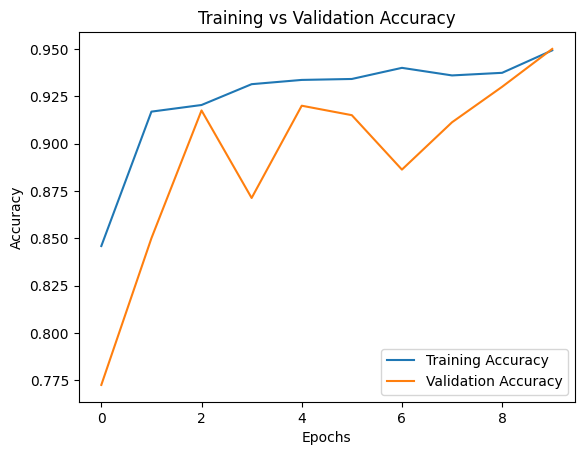

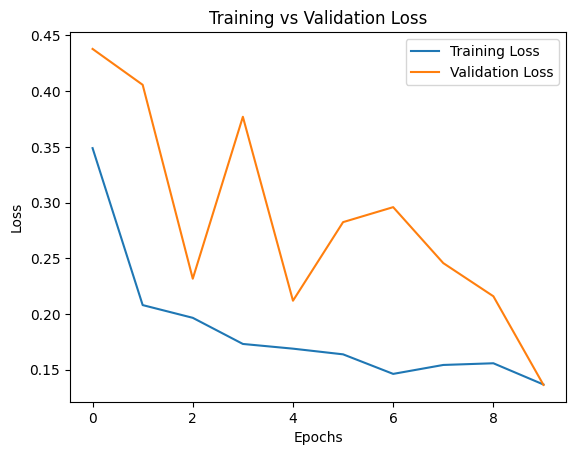

In [ ]:
# STEP 10: Plot training & validation accuracy and loss

import matplotlib.pyplot as plt

# Accuracy plot
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

# Loss plot
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()


In [ ]:
# STEP 11: Save the trained model

model.save("pneumonia_cnn_from_scratch.h5")

print("Model saved successfully as pneumonia_cnn_from_scratch.h5")


Model saved successfully as pneumonia_cnn_from_scratch.h5


In [ ]:
# STEP 12: Load saved model and predict a single image

import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the saved model
loaded_model = tf.keras.models.load_model("pneumonia_cnn_from_scratch.h5")

print("Model loaded successfully")

# Path to a test image (change filename if needed)
img_path = test_dir + "/PNEUMONIA/" + os.listdir(test_dir + "/PNEUMONIA")[0]

# Load and preprocess image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
prediction = loaded_model.predict(img_array)[0][0]

# Output result
if prediction > 0.5:
    print("Prediction: PNEUMONIA")
else:
    print("Prediction: NORMAL")

print("Prediction probability:", prediction)


Model loaded successfully
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step
Prediction: PNEUMONIA
Prediction probability: 0.99646556
